In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

import calendar
import datetime

import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf

In [3]:
pd.set_option('display.float_format', '{:.5f}'.format)

## Reading the Data

In [4]:
# Reading the file
df_sales = pd.read_csv('ConsumerElectronics.csv', na_values=['', ' '])
df_sales.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00000,3419300926147000.00000,6400.00000,1,\N,\N,COD,5,-1012991307785880064.00000,-7791755829057349632.00000,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00000,1420830839915200.00000,6900.00000,1,\N,\N,COD,7,-8990324579055120384.00000,7335411490974310400.00000,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00000,2421912925714800.00000,1990.00000,1,\N,\N,COD,10,-1040442942046599936.00000,-7477687762286570496.00000,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00000,4416592101738400.00000,1690.00000,1,\N,\N,Prepaid,4,-7604960843527140352.00000,-5835931638776609792.00000,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00000,4419525153426400.00000,1618.00000,1,\N,\N,Prepaid,6,2894557208345299968.00000,534735360997241984.00000,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


### Data Understanding for Consumer Electronics

In [5]:
# Inspecting data and identifying total number of rows and for nulls in rows.

print(df_sales.shape)
print(df_sales.info())

(1648824, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1643920 non-null float64
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1648824 non

In [6]:
df_sales.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,cust_id,pincode,product_mrp,product_procurement_sla
count,1648824.00000,1648824.00000,1648824.00000,1648824.00000,1643920.00000,1648824.00000,1648824.00000,1643920.00000,1643920.00000,1648824.00000,1648824.00000
mean,2015.51856,6.58565,2842444674146328.50000,13756277530325384.00000,2461.12410,1.02209,5.68783,-7057686221886427.00000,100212752554891296.00000,4108.30861,5.40345
std,0.49966,3.62335,1269134332596894.25000,55945981798631008.00000,5618.84224,0.25353,2.98334,5327063552104650752.00000,5312978967974574080.00000,8510.91777,53.46618
min,2015.00000,1.00000,76331515.00000,108016495.00000,0.00000,1.00000,0.00000,-9223350545281059840.00000,-9221830354194010112.00000,0.00000,-1.00000
25%,2015.00000,3.00000,1602588503969575.00000,1606725138262300.00000,340.00000,1.00000,4.00000,-4616853753330214912.00000,-4414802399060830208.00000,799.00000,1.00000
50%,2016.00000,6.00000,2611824528743350.00000,2619185472741150.00000,750.00000,1.00000,6.00000,-17380549602964150.00000,124091127596468000.00000,1599.00000,2.00000
75%,2016.00000,10.00000,3610613539366250.00000,4397705931628400.00000,1999.00000,1.00000,7.00000,4603580472579527680.00000,4786651404994039808.00000,3499.00000,3.00000
max,2016.00000,12.00000,5395076790260600.00000,300037347717704000.00000,226947.00000,50.00000,1006.00000,9223362162226820096.00000,9222980202332239872.00000,299999.00000,1000.00000


In [7]:
# Converting string to datetime format
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])

In [8]:
# Filtering data for July 2015 to June 2016

df_sales = df_sales[(df_sales['order_date'] > pd.Timestamp(2015,6,30)) & (df_sales['order_date'] < pd.Timestamp(2016,7,1))]

In [9]:
# Checking the date range of the orders
df_sales.groupby(['Year','Month']).size().reset_index().rename(columns={0:'count'})

,Year,Month,count
0,2015,7,88683
1,2015,8,271
2,2015,9,209202
3,2015,10,207301
4,2015,11,130203
5,2015,12,158151
6,2016,1,143768
7,2016,2,144084
8,2016,3,153299
9,2016,4,134390


In [10]:
# Number of missing values in each column.
print(df_sales.isnull().sum())

# Getting the column-wise null percentage
round(100*(df_sales.isnull().sum()/len(df_sales.index)),2)  

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                4904
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact.order_payment_type            0
sla                                   0
cust_id                            4904
pincode                            4904
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64


fsn_id                            0.00000
order_date                        0.00000
Year                              0.00000
Month                             0.00000
order_id                          0.00000
order_item_id                     0.00000
gmv                               0.30000
units                             0.00000
deliverybdays                     0.00000
deliverycdays                     0.00000
s1_fact.order_payment_type        0.00000
sla                               0.00000
cust_id                           0.30000
pincode                           0.30000
product_analytic_super_category   0.00000
product_analytic_category         0.00000
product_analytic_sub_category     0.00000
product_analytic_vertical         0.00000
product_mrp                       0.00000
product_procurement_sla           0.00000
dtype: float64

In [11]:
# There are nulls in gmv, cust_id, pincode and high percentage of null values in deliverybdays and deliverycdays. 

# There are 0.3% of our total dataset as nulls in gmv, cust_id and pincode. So, we can drop these rows.
df_sales = df_sales[~np.isnan(df_sales['gmv'])]

In [12]:
# From above we can see that in deliverybdays and deliverycdays there are \N values. 
# We can treat these values as 0.

print(len(df_sales[df_sales['deliverybdays'] == '\\N']))
print(len(df_sales[df_sales['deliverycdays'] == '\\N']))


1307968
1307967


In [13]:
# Dropping the columns deliverybdays and deliverycdays

df_sales = df_sales.drop(['deliverybdays', 'deliverycdays'], axis=1)

In [14]:
# Replace the \n values with 0

df_sales = df_sales.replace(['\\N'], 0)

In [15]:
# Number of missing values in each column.
print(df_sales.isnull().sum())

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64


In [16]:
# Checking for unique values in each columns
df_sales.nunique()

fsn_id                               21212
order_date                         1152119
Year                                     2
Month                                   12
order_id                           1496715
order_item_id                      1476536
gmv                                  12520
units                                   27
s1_fact.order_payment_type               2
sla                                     60
cust_id                            1200692
pincode                               7564
product_analytic_super_category          1
product_analytic_category                5
product_analytic_sub_category           14
product_analytic_vertical               74
product_mrp                           1928
product_procurement_sla                 17
dtype: int64

In [17]:
# We have only 1 unique value in product_analytic_super_category, so this column can be dropped.
df_sales = df_sales.drop(['product_analytic_super_category'], axis=1)

In [18]:
df_sales.shape

(1643311, 17)

In [19]:
#There can be duplicate rows. Hence deleting all duplicate values and only keeping the first row.
df_sales.drop_duplicates(subset=['order_id','order_item_id'], keep = 'first', inplace = True)

In [20]:
print(df_sales.shape)

(1504236, 17)


### EDA

In [21]:
# Since we are only interested in 3 product subcategories  - camera accessory, home audio and gaming accessory.
# So, we would filter our data early.

subcategories = ['CameraAccessory', 'HomeAudio', 'GamingAccessory']

df_sales = df_sales[df_sales['product_analytic_sub_category'].isin(subcategories)]

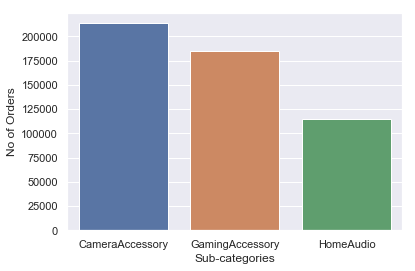

In [22]:
sns.countplot(x='product_analytic_sub_category', data=df_sales)
plt.xlabel('Sub-categories')
plt.ylabel('No of Orders')
plt.show()

In [23]:
df_sales.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,cust_id,pincode,product_mrp,product_procurement_sla
count,512684.00000,512684.00000,512684.00000,512684.00000,512684.00000,512684.00000,512684.00000,512684.00000,512684.00000,512684.00000,512684.00000
mean,2015.57658,6.22502,2833834147633401.00000,9327351222816772.00000,1287.31915,1.02454,5.88615,-6403515785380950.00000,96298378943100000.00000,2486.16705,2.53917
std,0.49410,3.67411,1292168216773802.75000,43493867481951296.00000,2441.12186,0.24471,2.70086,5330618613379304448.00000,5311987843984033792.00000,4691.97856,1.73820
min,2015.00000,1.00000,162957597.00000,207200079.00000,0.00000,1.00000,0.00000,-9223193276469189632.00000,-9221830354194010112.00000,0.00000,-1.00000
25%,2015.00000,3.00000,1595376054445500.00000,1597587675505500.00000,299.00000,1.00000,4.00000,-4632973838674757632.00000,-4424580572712860160.00000,749.00000,2.00000
50%,2016.00000,6.00000,2609370200214800.00000,2612745483260450.00000,549.00000,1.00000,6.00000,-18466860101573400.00000,132855035282258000.00000,1200.00000,2.00000
75%,2016.00000,10.00000,3615511510431800.00000,3641547027657075.00000,1499.00000,1.00000,7.00000,4613363020623342592.00000,4786651404994039808.00000,2800.00000,3.00000
max,2016.00000,12.00000,4641664595370500.00000,300037347717704000.00000,148050.00000,39.00000,60.00000,9223344416517810176.00000,9216565254650600448.00000,180000.00000,15.00000


In [24]:
# No of unique fsn id/products left in 3 subcategories.

len(df_sales['fsn_id'].unique())

9002

In [25]:
# Product MRP shows a minimum value of 0. Checking for MRP

df_sales['product_mrp'].describe()

count   512684.00000
mean      2486.16705
std       4691.97856
min          0.00000
25%        749.00000
50%       1200.00000
75%       2800.00000
max     180000.00000
Name: product_mrp, dtype: float64

In [26]:
# Products should not have MRP as 0. 

df_sales[df_sales['product_mrp'] == 0].shape

(3072, 17)

In [27]:
df_sales.shape

(512684, 17)

In [28]:
# Products cannot have an MRP = 0 so they can either be freebies or data is not entered correctly. 
# So we can drop rows with MRP as 0.

df_sales = df_sales[df_sales['product_mrp'] !=0 ]
df_sales.shape

(509612, 17)

In [29]:
# Checking for GMV
df_sales['gmv'].describe()

count   509612.00000
mean      1291.03384
std       2438.16281
min          0.00000
25%        299.00000
50%        550.00000
75%       1500.00000
max     148050.00000
Name: gmv, dtype: float64

In [30]:
# Checking GMV = 0 rows. 
df_sales[df_sales['gmv'] == 0].shape

(236, 17)

In [31]:
# These can be products which are sold at 100% discount. Which is not possible. We would drop these as well.
df_sales = df_sales[df_sales['gmv'] !=0 ]
df_sales.shape

(509376, 17)

In [32]:
# GMV should always be less than or equal to MRP * Units. It cannot be higher than this value.

df_sales[df_sales['gmv'] > df_sales['product_mrp']*df_sales['units']].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
511,ACCCX3SGJRUGH99Z,2015-10-06 04:41:01,2015,10,4409414274572400.00000,4409414274572400.00000,38839.00000,1,Prepaid,6,-1617884985499729920.00000,-5488422414876180480.00000,CameraAccessory,CameraAccessory,Lens,34980,0
512,ACCCX3SGN4BGZGQY,2015-10-16 05:36:04,2015,10,2417955407141700.00000,2417955407141700.00000,30155.00000,1,Prepaid,4,7810252194098679808.00000,-3845369806734649856.00000,CameraAccessory,CameraAccessory,Lens,24696,1
818,ACCCX3SUBDTT3GMA,2015-10-08 23:12:54,2015,10,1411811239304700.00000,1411811239304700.00000,450.00000,1,COD,7,1094225417257330048.00000,-4625296276251990016.00000,CameraAccessory,CameraAccessory,Lens,405,0
819,ACCCX3SUBDTT3GMA,2015-10-22 11:23:26,2015,10,4423484217011800.00000,4423484217011800.00000,900.00000,2,Prepaid,8,6138352773202599936.00000,-6222871012507570176.00000,CameraAccessory,CameraAccessory,Lens,405,0
820,ACCCX3SUBXAF4QRK,2015-10-07 13:31:33,2015,10,1410601049371400.00000,1410601049371400.00000,380.00000,1,COD,5,-8616460973717909504.00000,1948276093461929984.00000,CameraAccessory,CameraAccessory,Lens,285,-1


In [33]:
# Number of records having GMV > MRP* Units
df_sales[df_sales['gmv'] > df_sales['product_mrp']*df_sales['units']].shape

(12412, 17)

In [34]:
# Let's set the GMV as MRP * Units for such records.

df_sales.loc[df_sales['gmv'] > df_sales['product_mrp']*df_sales['units'], 'gmv'] = df_sales['product_mrp']*df_sales['units']

In [35]:
# For units
df_sales['units'].describe()

count   509376.00000
mean         1.02403
std          0.23863
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         39.00000
Name: units, dtype: float64

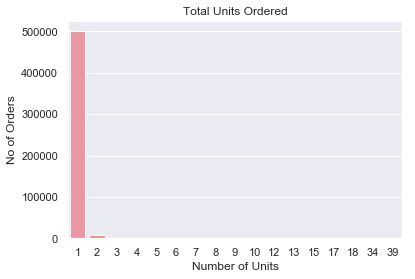

In [36]:
#Plot for units 
sns.countplot(x='units', data=df_sales)
plt.title('Total Units Ordered', fontsize=12)
plt.xlabel('Number of Units')
plt.ylabel('No of Orders')
plt.show()

#### We can see that most of the orders are single items. Only a few orders have more than 1 unit per order.

In [37]:
df_sales.shape

(509376, 17)

In [38]:
# For payment type
df_sales['s1_fact.order_payment_type'].value_counts()

COD        373992
Prepaid    135384
Name: s1_fact.order_payment_type, dtype: int64

In [39]:
df_sales['s1_fact.order_payment_type'].describe()

count     509376
unique         2
top          COD
freq      373992
Name: s1_fact.order_payment_type, dtype: object

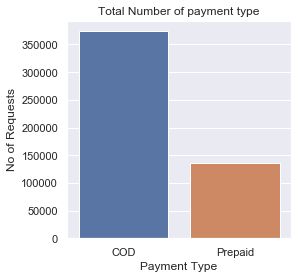

In [40]:
#Plot for Payment type 

plt.figure(figsize=(4, 4))
sns.countplot(x='s1_fact.order_payment_type', data=df_sales)
plt.title('Total Number of payment type', fontsize=12)
plt.xlabel('Payment Type')
plt.ylabel('No of Requests')
plt.show()

In [41]:
# Stats for cust_id
df_sales['cust_id'].describe()

count                 509376.00000
mean       -7111415317368864.00000
std      5330695466971495424.00000
min     -9223193276469189632.00000
25%     -4634553400455175168.00000
50%       -18593007174421400.00000
75%      4613032252640041984.00000
max      9223344416517810176.00000
Name: cust_id, dtype: float64

In [42]:
# Stats for pincode
df_sales['pincode'].describe()

count                 509376.00000
mean       96542962988796448.00000
std      5311981928708329472.00000
min     -9221830354194010112.00000
25%     -4424580572712860160.00000
50%       132855035282258000.00000
75%      4786651404994039808.00000
max      9216565254650600448.00000
Name: pincode, dtype: float64

In [43]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509376 entries, 0 to 1542378
Data columns (total 17 columns):
fsn_id                           509376 non-null object
order_date                       509376 non-null datetime64[ns]
Year                             509376 non-null int64
Month                            509376 non-null int64
order_id                         509376 non-null float64
order_item_id                    509376 non-null float64
gmv                              509376 non-null float64
units                            509376 non-null int64
s1_fact.order_payment_type       509376 non-null object
sla                              509376 non-null int64
cust_id                          509376 non-null float64
pincode                          509376 non-null float64
product_analytic_category        509376 non-null object
product_analytic_sub_category    509376 non-null object
product_analytic_vertical        509376 non-null object
product_mrp                      509376

In [44]:
#For customer id and pincode into strings remove the -ve sign by converting to absolute values and then convert to Strings
df_sales['cust_id'] = df_sales['cust_id'].abs()
df_sales['pincode'] = df_sales['pincode'].abs()

In [45]:
# Convert customer id and pincode into strings  
df_sales['cust_id'] = df_sales['cust_id'].apply(str)
df_sales['pincode'] = df_sales['pincode'].apply(str)

In [46]:
# Doing for product_analytic_category
df_sales['product_analytic_category'].value_counts()

CameraAccessory       210682
GamingHardware        184348
EntertainmentSmall    114346
Name: product_analytic_category, dtype: int64

In [47]:
# Doing for product_analytic_vertical
df_sales['product_analytic_vertical'].value_counts()

HomeAudioSpeaker         79477
GamingHeadset            59338
GamePad                  52725
Flash                    47462
GamingMouse              34610
CameraBattery            33894
CameraTripod             32830
Lens                     30640
FMRadio                  25206
CameraBag                15722
CameraBatteryCharger     13574
Binoculars               13428
Filter                   10008
GamingAccessoryKit        7460
TVOutCableAccessory       6623
GamingKeyboard            6213
GamingMemoryCard          5933
CameraRemoteControl       5223
GamingMousePad            4119
VoiceRecorder             3379
GamingAdapter             3037
JoystickGamingWheel       2666
BoomBox                   2446
CameraAccessory           1927
Dock                      1839
Telescope                 1675
Strap                     1446
HiFiSystem                1386
CameraFilmRolls           1281
MotionController          1039
CameraMount                981
GamingSpeaker              493
DockingS

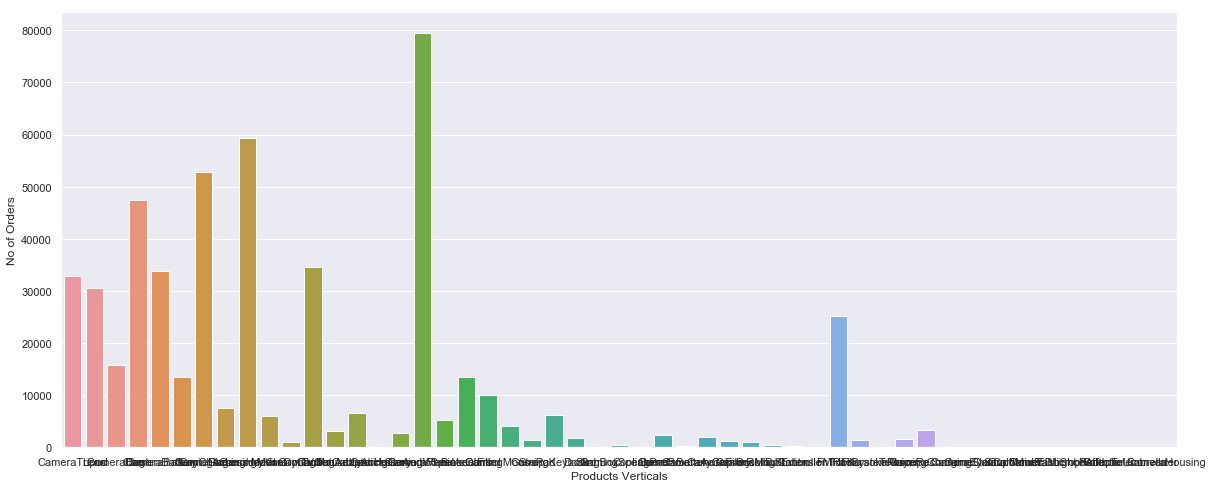

In [48]:
# Count Plot
plt.figure(figsize=(20,8))
sns.countplot(x='product_analytic_vertical', data=df_sales)
plt.xlabel('Products Verticals')
plt.ylabel('No of Orders')
plt.show()

In [49]:
# Doing for product_procurement_sla
df_sales['product_procurement_sla'].describe()

count   509376.00000
mean         2.56072
std          1.72180
min         -1.00000
25%          2.00000
50%          2.00000
75%          3.00000
max         15.00000
Name: product_procurement_sla, dtype: float64

In [50]:
df_sales[df_sales['product_procurement_sla'] < 0].shape

(10655, 17)

In [51]:
# Impute all rows with product_procurement_sla < 0 with 0
df_sales.loc[df_sales['product_procurement_sla'] < 0, 'product_procurement_sla'] = 0

In [52]:
# Doing for sla
df_sales['sla'].describe()

count   509376.00000
mean         5.88060
std          2.70229
min          0.00000
25%          4.00000
50%          6.00000
75%          7.00000
max         60.00000
Name: sla, dtype: float64

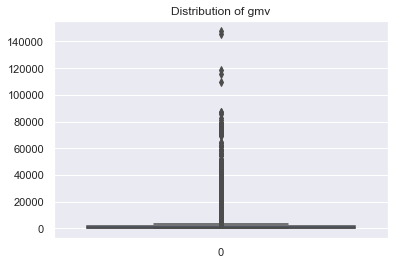

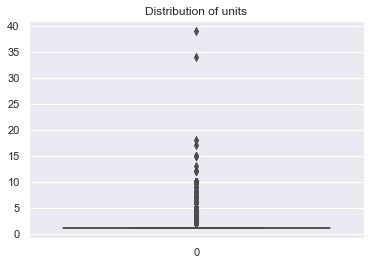

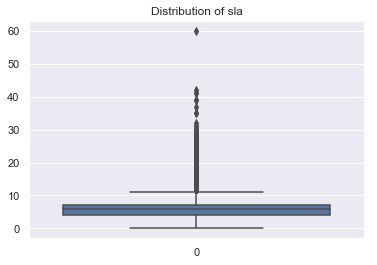

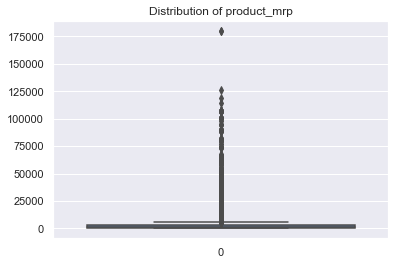

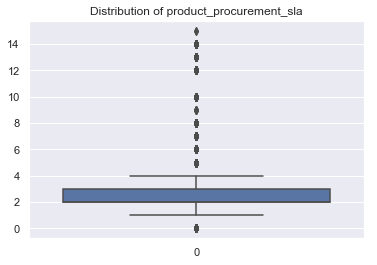

In [53]:
# Outlier treatment:
# We would take maximum value of the following columns as mean + 3 standard deviations and minimum value as mean - 3 standard deviation

for col in ['gmv','units','sla','product_mrp','product_procurement_sla']:
    sns.boxplot(data=df_sales[col])
    plt.title('Distribution of ' + col)
    plt.show()
    mean= np.mean(df_sales[col])
    std= np.std(df_sales[col])
    max_cap_value= mean+ 3*std
    min_cap_value= mean- 3*std

    df_sales[col]= df_sales[col].apply(lambda x: x if x<= max_cap_value else max_cap_value)
    df_sales[col]= df_sales[col].apply(lambda x: x if x>= min_cap_value else min_cap_value)

In [54]:
df_sales.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
count,509376.00000,509376.00000,509376.00000,509376.00000,509376.00000,509376.00000,509376.00000,509376.00000,509376.00000
mean,2015.57662,6.22589,2834510550066001.00000,9339316963739056.00000,1197.02516,1.01318,5.86123,2264.23771,2.53858
std,0.49410,3.67354,1291647485860757.25000,43530647464149272.00000,1552.56197,0.09789,2.62134,2768.68001,1.46062
min,2015.00000,1.00000,162957597.00000,207200079.00000,10.00000,1.00000,0.00000,63.00000,0.00000
25%,2015.00000,3.00000,1595552399622150.00000,1598031243156700.00000,299.00000,1.00000,4.00000,766.00000,2.00000
50%,2016.00000,6.00000,2609538580917550.00000,2612949785130750.00000,550.00000,1.00000,6.00000,1200.00000,2.00000
75%,2016.00000,10.00000,3615597916886100.00000,3641647344908700.00000,1500.00000,1.00000,7.00000,2800.00000,3.00000
max,2016.00000,12.00000,4641664595370500.00000,300037347717704000.00000,8594.26134,1.73990,13.98745,16611.08811,7.63386


### New Columns Creation & KPIs

In [55]:
# Creating week numbers
df_sales['week_number'] = df_sales['order_date'].dt.week
df_sales['day'] = df_sales['order_date'].dt.day

In [56]:
# Checking the weeks of the orders
df_sales.groupby(['Year','Month', 'week_number']).size().reset_index().rename(columns={0:'count'})

,Year,Month,week_number,count
0,2015,7,27,99
1,2015,7,28,8120
2,2015,7,29,8439
3,2015,7,30,7974
4,2015,7,31,5520
5,2015,8,31,2
6,2015,8,32,4
7,2015,8,33,5
8,2015,8,34,1
9,2015,8,35,6


In [57]:
# We would want the weeks to continue i.e. January 2016 week 1 should be week 54 instead of week 1.

df_sales.loc[(df_sales['Year'] == 2016)& (df_sales['week_number'] <= 26), 'week_number'] = df_sales['week_number'] + 53

In [58]:
# Checking the weeks of the orders
df_sales.groupby(['Year', 'Month', 'week_number']).size().reset_index().rename(columns={0:'count'})

,Year,Month,week_number,count
0,2015,7,27,99
1,2015,7,28,8120
2,2015,7,29,8439
3,2015,7,30,7974
4,2015,7,31,5520
5,2015,8,31,2
6,2015,8,32,4
7,2015,8,33,5
8,2015,8,34,1
9,2015,8,35,6


So, we have total of 52 weeks data where week number ranges from 27-79 and date range is from July 2015 - June 2016.

In [59]:
df_sales.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,week_number,day
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00000,3419300926147000.00000,6400.00000,1.00000,COD,5.00000,1.01299130778588e+18,7.79175582905735e+18,CameraAccessory,CameraAccessory,CameraTripod,7190.00000,0.00000,42,17
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00000,1420830839915200.00000,6900.00000,1.00000,COD,7.00000,8.99032457905512e+18,7.33541149097431e+18,CameraAccessory,CameraAccessory,CameraTripod,7190.00000,0.00000,43,19
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00000,2421912925714800.00000,1990.00000,1.00000,COD,10.00000,1.0404429420466e+18,7.47768776228657e+18,CameraAccessory,CameraAccessory,CameraTripod,2099.00000,3.00000,43,20
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00000,4416592101738400.00000,1690.00000,1.00000,Prepaid,4.00000,7.60496084352714e+18,5.83593163877661e+18,CameraAccessory,CameraAccessory,CameraTripod,2099.00000,3.00000,42,14
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00000,4419525153426400.00000,1618.00000,1.00000,Prepaid,6.00000,2.8945572083453e+18,5.34735360997242e+17,CameraAccessory,CameraAccessory,CameraTripod,2099.00000,3.00000,42,17


In [60]:
# Counting the number of rows left
df_sales.shape

(509376, 19)

In [61]:
df_sales['payment_prepaid'] = np.where(df_sales['s1_fact.order_payment_type'] == 'Prepaid' , 1, 0)

In [62]:
df_sales.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,week_number,day,payment_prepaid
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00000,3419300926147000.00000,6400.00000,1.00000,COD,5.00000,1.01299130778588e+18,7.79175582905735e+18,CameraAccessory,CameraAccessory,CameraTripod,7190.00000,0.00000,42,17,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00000,1420830839915200.00000,6900.00000,1.00000,COD,7.00000,8.99032457905512e+18,7.33541149097431e+18,CameraAccessory,CameraAccessory,CameraTripod,7190.00000,0.00000,43,19,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00000,2421912925714800.00000,1990.00000,1.00000,COD,10.00000,1.0404429420466e+18,7.47768776228657e+18,CameraAccessory,CameraAccessory,CameraTripod,2099.00000,3.00000,43,20,0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00000,4416592101738400.00000,1690.00000,1.00000,Prepaid,4.00000,7.60496084352714e+18,5.83593163877661e+18,CameraAccessory,CameraAccessory,CameraTripod,2099.00000,3.00000,42,14,1
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00000,4419525153426400.00000,1618.00000,1.00000,Prepaid,6.00000,2.8945572083453e+18,5.34735360997242e+17,CameraAccessory,CameraAccessory,CameraTripod,2099.00000,3.00000,42,17,1


In [63]:
# KPI - List Price

df_sales['List_Price'] = df_sales['gmv']/df_sales['units']

In [64]:
# KPI - Discount Offered
df_sales['discount'] = (( df_sales['product_mrp'] - df_sales['List_Price'])/df_sales['product_mrp'])*100

In [65]:
# Creating pay_day flag for 1st and 15th of each month
def payday(date):
    if (date == 1) or (date==15):
        return 1
    else:
        return 0

In [66]:
df_sales['pay_day_flag'] = df_sales['order_date'].dt.day.apply(payday)

In [67]:
# KPI for special sales day flag

# Reading special sales
special_sales_day = pd.Series(pd.date_range(start='7/18/2015', end='7/19/2015' , freq='D'))
special_sales_2 = pd.Series(pd.date_range(start='8/15/2015', end='8/17/2015' , freq='D'))
special_sales_3 = pd.Series(pd.date_range(start='8/28/2015', end='8/30/2015' , freq='D'))
special_sales_4 = pd.Series(pd.date_range(start='10/15/2015', end='10/17/2015' , freq='D'))
special_sales_5 = pd.Series(pd.date_range(start='11/07/2015', end='11/14/2015' , freq='D'))
special_sales_6 = pd.Series(pd.date_range(start='12/25/2015', end='1/03/2016' , freq='D'))
special_sales_7 = pd.Series(pd.date_range(start='1/20/2016', end='1/22/2016' , freq='D'))
special_sales_8 = pd.Series(pd.date_range(start='2/1/2016', end='2/2/2016' , freq='D'))
special_sales_9 = pd.Series(pd.date_range(start='2/20/2016', end='2/21/2016' , freq='D'))
special_sales_10 = pd.Series(pd.date_range(start='2/14/2016', end='2/15/2016' , freq='D'))
special_sales_11 = pd.Series(pd.date_range(start='3/7/2016', end='3/9/2016' , freq='D'))
special_sales_11 = pd.Series(pd.date_range(start='5/25/2016', end='5/27/2016' , freq='D'))

In [68]:
# Reading special sales

special_sales_day = special_sales_day.append(special_sales_2).append(special_sales_3).append(special_sales_4).append(special_sales_5).append(special_sales_6).append(special_sales_7).append(special_sales_8).append(special_sales_9).append(special_sales_10).append(special_sales_11)
special_sales_day = special_sales_day.dt.date
sales_date_list = special_sales_day.tolist()

In [69]:
def sale_day(date):
    if date in sales_date_list:
        return 1
    else :
        return 0
    

In [70]:
df_sales['sale_day_flag'] = df_sales['order_date'].dt.date.apply(sale_day)

In [71]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509376 entries, 0 to 1542378
Data columns (total 24 columns):
fsn_id                           509376 non-null object
order_date                       509376 non-null datetime64[ns]
Year                             509376 non-null int64
Month                            509376 non-null int64
order_id                         509376 non-null float64
order_item_id                    509376 non-null float64
gmv                              509376 non-null float64
units                            509376 non-null float64
s1_fact.order_payment_type       509376 non-null object
sla                              509376 non-null float64
cust_id                          509376 non-null object
pincode                          509376 non-null object
product_analytic_category        509376 non-null object
product_analytic_sub_category    509376 non-null object
product_analytic_vertical        509376 non-null object
product_mrp                      5093

In [72]:
# Calculating fraction of prepaid orders per sub category.
# Calculating this separately as agg. only supports sum or count.
df_prepaid=df_sales.groupby(['product_analytic_sub_category','week_number'], as_index=False).agg({'payment_prepaid': ['sum','count']})

df_prepaid['prepaid_frac'] = df_prepaid['payment_prepaid']['sum']/df_prepaid['payment_prepaid']['count']
df_prepaid.columns = df_prepaid.columns.droplevel()
df_prepaid = df_prepaid.drop(['sum','count'], axis=1)
df_prepaid.columns = ['product_analytic_sub_category', 'week_number','prepaid_frac']
df_prepaid.head()

,product_analytic_sub_category,week_number,prepaid_frac
0,CameraAccessory,27,1.00000
1,CameraAccessory,28,0.33402
2,CameraAccessory,29,0.34254
3,CameraAccessory,30,0.32706
4,CameraAccessory,31,0.30167


In [73]:
# Aggregating the dataset
# Taking sum for GMV, Units
# We are taking sum for flag columns but will replace with dummy value later 

df_sales_agg = df_sales.groupby(['product_analytic_sub_category', 'week_number'], as_index=False).agg(
                {'gmv': 'sum', 'units': 'sum','sla':'mean', 
                 'product_mrp': 'mean','product_procurement_sla': 'mean', 
                'List_Price':'mean', 'discount':'mean', 'pay_day_flag':'sum', 'sale_day_flag':'sum'})

In [74]:
# Converting pay_day_flag , sale_day_flag to categorical variable

def convert_categorical(x):
    if x > 0:
        return 1
    else :
        return 0

In [75]:
# Converting pay_day_flag to categorical variable
df_sales_agg['pay_day_flag'] = df_sales_agg.pay_day_flag.apply(lambda x: convert_categorical(x))

In [76]:
# Converting sale_day_flag to categorical variable
df_sales_agg['sale_day_flag'] = df_sales_agg.pay_day_flag.apply(lambda x: convert_categorical(x))

In [77]:
df_sales_agg.describe()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag
count,154.00000,154.00000,154.00000,154.00000,154.00000,154.00000,154.00000,154.00000,154.00000,154.00000
mean,53.62987,3959323.94201,3351.24744,5.77460,2382.50655,2.54616,1289.73740,42.93211,0.43506,0.43506
std,15.18038,2082165.97379,1816.32860,0.81928,944.91764,0.29939,580.55717,7.68057,0.49738,0.49738
min,27.00000,299.00000,1.00000,2.50000,362.00000,1.00000,195.50000,25.28299,0.00000,0.00000
25%,41.00000,2993996.09378,2207.27343,5.48112,1654.43314,2.44648,855.08778,36.74267,0.00000,0.00000
50%,54.00000,3759474.19042,3211.92571,5.83019,2109.57569,2.54763,1049.15970,43.42756,0.00000,0.00000
75%,66.75000,4740469.46550,4375.02186,6.22484,3296.75670,2.67708,2011.00312,47.84669,1.00000,1.00000
max,79.00000,17212005.93803,11128.13263,9.49372,4675.97436,4.00000,2741.41026,84.97487,1.00000,1.00000


In [78]:
# Merge agg. sales with the prepaid fraction
df_sales_agg = pd.merge(df_sales_agg, df_prepaid , how='left', on=['product_analytic_sub_category','week_number'])

## Reading the Advertisement Spends data

In [79]:
df_media = pd.read_excel('Media data and other information.xlsx', sheetname='Media Investment', skiprows=2)

In [80]:
df_media.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,nan,2015,7,17.06178,0.21533,2.53301,7.41427,0.00093,1.32728,0.54725,5.02370,nan,nan
1,nan,2015,8,5.06431,0.00644,1.27807,1.06333,0.00001,0.12924,0.07368,2.51353,nan,nan
2,nan,2015,9,96.25438,3.87950,1.35653,62.78765,0.61029,16.37999,5.03827,6.20215,nan,nan
3,nan,2015,10,170.15630,6.14471,12.62248,84.67253,3.44407,24.37178,6.97371,31.92701,nan,nan
4,nan,2015,11,51.21622,4.22063,1.27547,14.17212,0.16863,19.56157,6.59577,5.22203,nan,nan


In [81]:
# Dropping first column
df_media = df_media.drop('Unnamed: 0', axis = 1)

df_media = df_media.fillna(0)
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                12 non-null float64
Other                12 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


In [82]:
# Renaming the column
df_media.rename(columns={' Affiliates':'Affiliates'}, inplace=True)

In [83]:
def days_in_month(args):
    days=calendar.monthrange(int(args[0]),int(args[1]))[1]
    return(pd.Series(days))

In [84]:
# Getting number of days in month
df_media['Days'] = df_media.apply(days_in_month ,axis=1)

In [85]:
df_media.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Days
0,2015,7,17.06178,0.21533,2.53301,7.41427,0.00093,1.32728,0.54725,5.02370,0.00000,0.00000,31
1,2015,8,5.06431,0.00644,1.27807,1.06333,0.00001,0.12924,0.07368,2.51353,0.00000,0.00000,31
2,2015,9,96.25438,3.87950,1.35653,62.78765,0.61029,16.37999,5.03827,6.20215,0.00000,0.00000,30
3,2015,10,170.15630,6.14471,12.62248,84.67253,3.44407,24.37178,6.97371,31.92701,0.00000,0.00000,31
4,2015,11,51.21622,4.22063,1.27547,14.17212,0.16863,19.56157,6.59577,5.22203,0.00000,0.00000,30


In [86]:
# We would convert monthly adspends to daily adspends and than convert them to weekly.

datetoweek = pd.Series(pd.date_range(start='7/1/2015', end='6/30/2016' , freq='D'))
datetoweek_df = pd.DataFrame(dict(date_given=datetoweek))

datetoweek_df['Year'] = datetoweek_df['date_given'].dt.year
datetoweek_df['Month'] = datetoweek_df['date_given'].dt.month 
datetoweek_df['day'] = datetoweek_df['date_given'].dt.day
datetoweek_df.head()

,date_given,Year,Month,day
0,2015-07-01,2015,7,1
1,2015-07-02,2015,7,2
2,2015-07-03,2015,7,3
3,2015-07-04,2015,7,4
4,2015-07-05,2015,7,5


In [87]:
media_investment_daily = pd.merge(df_media, datetoweek_df , how='inner', on=['Month', 'Year'])

In [88]:
media_investment_daily.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Days,date_given,day
0,2015,7,17.06178,0.21533,2.53301,7.41427,0.00093,1.32728,0.54725,5.02370,0.00000,0.00000,31,2015-07-01,1
1,2015,7,17.06178,0.21533,2.53301,7.41427,0.00093,1.32728,0.54725,5.02370,0.00000,0.00000,31,2015-07-02,2
2,2015,7,17.06178,0.21533,2.53301,7.41427,0.00093,1.32728,0.54725,5.02370,0.00000,0.00000,31,2015-07-03,3
3,2015,7,17.06178,0.21533,2.53301,7.41427,0.00093,1.32728,0.54725,5.02370,0.00000,0.00000,31,2015-07-04,4
4,2015,7,17.06178,0.21533,2.53301,7.41427,0.00093,1.32728,0.54725,5.02370,0.00000,0.00000,31,2015-07-05,5


In [89]:
# Splitting the amounts on daily level

cols = ['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing','Online marketing', 
        'Affiliates', 'SEM', 'Radio', 'Other']

In [90]:
# Defining the function to split monthly amounts into daily and converting in INR as it is given in crores
def daily_amount(x):
    return x * 10000000/ media_investment_daily['Days'] 

In [91]:
# Applying the function to the list of columns
media_investment_daily[cols] = media_investment_daily[cols].apply(daily_amount)

In [92]:
media_investment_daily.head(10)

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Days,date_given,day
0,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-01,1
1,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-02,2
2,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-03,3
3,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-04,4
4,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-05,5
5,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-06,6
6,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-07,7
7,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-08,8
8,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-09,9
9,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-10,10


In [93]:
media_investment_daily['week_number'] = media_investment_daily['date_given'].dt.week

# We would want the weeks to continue i.e. January 2016 week 1 should be week 54 instead of week 1.

media_investment_daily.loc[(media_investment_daily['Year'] == 2016)& (media_investment_daily['week_number'] <= 26), 'week_number'] = media_investment_daily['week_number'] + 53

In [94]:
media_investment_daily.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Days,date_given,day,week_number
0,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-01,1,27
1,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-02,2,27
2,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-03,3,27
3,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-04,4,27
4,2015,7,5503798.52989,69461.35612,817101.19627,2391699.91407,300.93469,428154.06291,176533.50289,1620547.56294,0.00000,0.00000,31,2015-07-05,5,27


In [95]:
media_investment_weekly = media_investment_daily.groupby(['week_number']
                                                         , as_index=False).agg({'Total Investment': 'sum',
                                                                               'TV': 'sum', 'Digital': 'sum',
                                                                               'Sponsorship':'sum', 'Content Marketing': 'sum',
                                                                               'Online marketing': 'sum', 'Affiliates': 'sum',
                                                                               'SEM':'sum', 'Radio':'sum', 'Other':'sum'})

In [96]:
media_investment_weekly.head()

,week_number,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,27518992.64946,347306.78058,4085505.98137,11958499.57036,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000
1,28,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000
2,29,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000
3,30,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000
4,31,30786286.90057,351460.37616,4910069.64851,12644520.05944,1508.75418,2224153.71070,930205.56625,9724368.78533,0.00000,0.00000


In [97]:
# Calculating adstock
# Taking Adstock coefficient = .5

adstock_coeff = .5

# Let's take a copy of the above dataframe as we would not use the adstock in the initial linear model.
media_investment_adstock_weekly = media_investment_weekly.copy()

# We would assume that market investment is equal to what perception is, as TRP or other things are not given.
for col in cols:
    media_investment_adstock_weekly[col + '_adstock'] = tsa.filters.filtertools.recursive_filter(media_investment_adstock_weekly [col], adstock_coeff)

In [98]:
media_investment_adstock_weekly.head()

,week_number,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,...,Total Investment_adstock,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,27,27518992.64946,347306.78058,4085505.98137,11958499.57036,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,...,27518992.64946,347306.78058,4085505.98137,11958499.57036,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000
1,28,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,...,52286086.03398,659882.88311,7762461.36460,22721149.18369,2858.87955,4067463.59766,1677068.27744,15395201.84794,0.00000,0.00000
2,29,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,...,64669632.72624,816170.93437,9600939.05621,28102473.99035,3535.98260,5030810.23921,2074268.65894,19041433.86456,0.00000,0.00000
3,30,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,...,70861406.07237,894314.96000,10520177.90202,30793136.39368,3874.53412,5512483.55998,2272868.84969,20864549.87287,0.00000,0.00000
4,31,30786286.90057,351460.37616,4910069.64851,12644520.05944,1508.75418,2224153.71070,930205.56625,9724368.78533,0.00000,...,66216989.93676,798617.85617,10170158.59952,28041088.25628,3446.02124,4980395.49069,2066639.99110,20156643.72176,0.00000,0.00000


In [99]:
media_investment_adstock_weekly.head()

,week_number,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,...,Total Investment_adstock,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,27,27518992.64946,347306.78058,4085505.98137,11958499.57036,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,...,27518992.64946,347306.78058,4085505.98137,11958499.57036,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000
1,28,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,...,52286086.03398,659882.88311,7762461.36460,22721149.18369,2858.87955,4067463.59766,1677068.27744,15395201.84794,0.00000,0.00000
2,29,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,...,64669632.72624,816170.93437,9600939.05621,28102473.99035,3535.98260,5030810.23921,2074268.65894,19041433.86456,0.00000,0.00000
3,30,38526589.70925,486229.49282,5719708.37391,16741899.39851,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,...,70861406.07237,894314.96000,10520177.90202,30793136.39368,3874.53412,5512483.55998,2272868.84969,20864549.87287,0.00000,0.00000
4,31,30786286.90057,351460.37616,4910069.64851,12644520.05944,1508.75418,2224153.71070,930205.56625,9724368.78533,0.00000,...,66216989.93676,798617.85617,10170158.59952,28041088.25628,3446.02124,4980395.49069,2066639.99110,20156643.72176,0.00000,0.00000


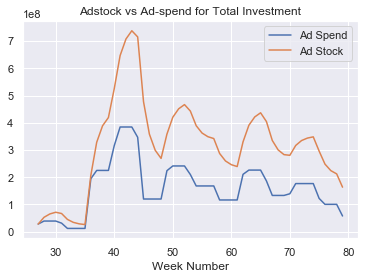

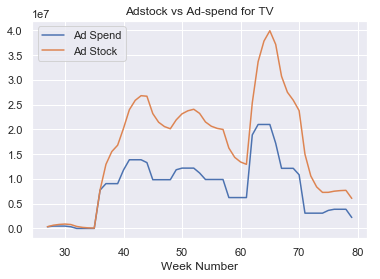

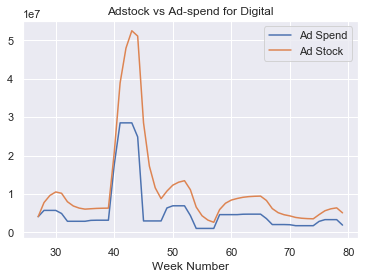

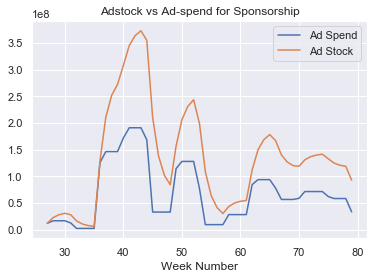

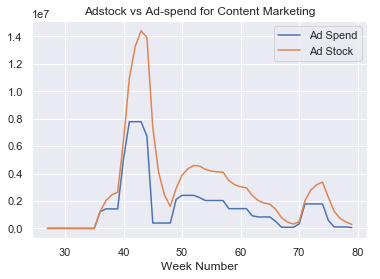

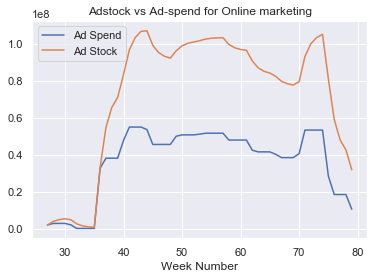

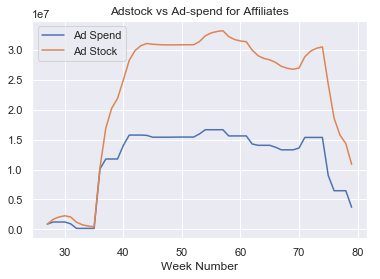

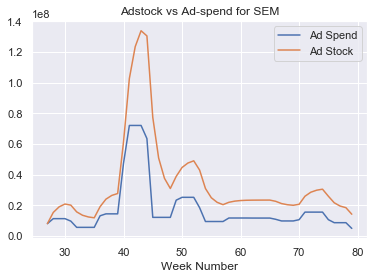

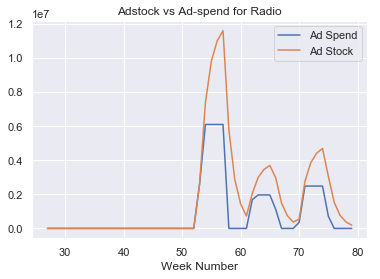

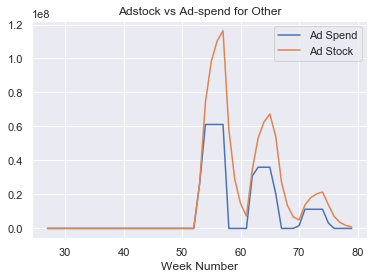

In [100]:
cols = ['Total Investment','TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other']

# Plotting ad-spends v/s ad-stocks for each category

for col in cols:
    plt.plot(media_investment_adstock_weekly['week_number'],media_investment_adstock_weekly[col], label= 'Ad Spend')
    plt.plot(media_investment_adstock_weekly['week_number'],media_investment_adstock_weekly[col + '_adstock'], label= 'Ad Stock')
    plt.legend()
    plt.xlabel('Week Number')
    plt.title('Adstock vs Ad-spend for ' + col)
    plt.show()
# Scale is shown on top right i.e in crores or 10-crores

In [101]:
# Removing original features from the adstock dataframe
# Removing Total Investment columns from ad-spends and ad-stock features
media_investment_adstock = media_investment_adstock_weekly.drop(columns=cols).drop(['Total Investment_adstock'], axis=1)

media_investment = media_investment_weekly.drop(['Total Investment'], axis=1)

In [102]:
media_investment_adstock.head(5)

,week_number,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,27,347306.78058,4085505.98137,11958499.57036,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000
1,28,659882.88311,7762461.36460,22721149.18369,2858.87955,4067463.59766,1677068.27744,15395201.84794,0.00000,0.00000
2,29,816170.93437,9600939.05621,28102473.99035,3535.98260,5030810.23921,2074268.65894,19041433.86456,0.00000,0.00000
3,30,894314.96000,10520177.90202,30793136.39368,3874.53412,5512483.55998,2272868.84969,20864549.87287,0.00000,0.00000
4,31,798617.85617,10170158.59952,28041088.25628,3446.02124,4980395.49069,2066639.99110,20156643.72176,0.00000,0.00000


## Reading the NPS data

In [103]:
df_nps = pd.read_excel('Media data and other information.xlsx', sheetname='Monthly NPS Score', header = 1 ,na_values=['', ' '])

In [104]:
df_nps.head()

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
NPS,54.59959,59.98710,46.92542,44.39839,47.00000,45.80000,47.09303,50.32741,49.02055,51.82761,47.30695,50.51669
Stock Index,1177.00000,1206.00000,1101.00000,1210.00000,1233.00000,1038.00000,1052.00000,1222.00000,1015.00000,1242.00000,1228.00000,1194.00000


In [105]:
# Transposing the dataframe to convert it for joining
df_nps = df_nps.transpose().reset_index()
df_nps.head()

,index,NPS,Stock Index
0,July'15,54.59959,1177.00000
1,Aug'15,59.98710,1206.00000
2,Sept'15,46.92542,1101.00000
3,Oct'15,44.39839,1210.00000
4,Nov'15,47.00000,1233.00000


In [106]:
# Formatting the dataframe
new = df_nps['index'].str.split("'", n = 1, expand = True)
df_nps['Month'] = new[0]
df_nps['Year'] = new[1]

df_nps.drop(columns =['index'], inplace = True) 
df_nps

,NPS,Stock Index,Month,Year
0,54.59959,1177.00000,July,15
1,59.98710,1206.00000,Aug,15
2,46.92542,1101.00000,Sept,15
3,44.39839,1210.00000,Oct,15
4,47.00000,1233.00000,Nov,15
5,45.80000,1038.00000,Dec,15
6,47.09303,1052.00000,Jan,16
7,50.32741,1222.00000,Feb,16
8,49.02055,1015.00000,Mar,16
9,51.82761,1242.00000,Apr,16


In [107]:
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May': 5, 'June':6, 'July': 7, 'Aug':8, 'Sept':9, 'Oct': 10, 'Nov':11, 'Dec':12 }
year_dict = {'15': 2015, '16': 2016}

In [108]:
# Adding month and year
df_nps['Month'] = df_nps['Month'].map(month_dict)
df_nps['Year'] = df_nps['Year'].map(year_dict)
df_nps

,NPS,Stock Index,Month,Year
0,54.59959,1177.00000,7,2015
1,59.98710,1206.00000,8,2015
2,46.92542,1101.00000,9,2015
3,44.39839,1210.00000,10,2015
4,47.00000,1233.00000,11,2015
5,45.80000,1038.00000,12,2015
6,47.09303,1052.00000,1,2016
7,50.32741,1222.00000,2,2016
8,49.02055,1015.00000,3,2016
9,51.82761,1242.00000,4,2016


In [109]:
df_nps = df_nps[['Year', 'Month', 'NPS', 'Stock Index']]

In [110]:
# Getting number of days in month
df_nps['Days'] = df_nps.apply(days_in_month ,axis=1)
df_nps

,Year,Month,NPS,Stock Index,Days
0,2015,7,54.59959,1177.00000,31
1,2015,8,59.98710,1206.00000,31
2,2015,9,46.92542,1101.00000,30
3,2015,10,44.39839,1210.00000,31
4,2015,11,47.00000,1233.00000,30
5,2015,12,45.80000,1038.00000,31
6,2016,1,47.09303,1052.00000,31
7,2016,2,50.32741,1222.00000,29
8,2016,3,49.02055,1015.00000,31
9,2016,4,51.82761,1242.00000,30


In [111]:
# Merging with date df
df_nps_daily = pd.merge(df_nps, datetoweek_df , how='inner', on=['Month', 'Year'])

In [112]:
df_nps_daily.head()

,Year,Month,NPS,Stock Index,Days,date_given,day
0,2015,7,54.59959,1177.00000,31,2015-07-01,1
1,2015,7,54.59959,1177.00000,31,2015-07-02,2
2,2015,7,54.59959,1177.00000,31,2015-07-03,3
3,2015,7,54.59959,1177.00000,31,2015-07-04,4
4,2015,7,54.59959,1177.00000,31,2015-07-05,5


In [113]:
df_nps_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 7 columns):
Year           366 non-null int64
Month          366 non-null int64
NPS            366 non-null float64
Stock Index    366 non-null float64
Days           366 non-null int64
date_given     366 non-null datetime64[ns]
day            366 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 22.9 KB


In [114]:
# Converting NPS and stock Index to Integer 
df_nps_daily[['NPS' , 'Stock Index']] = df_nps_daily[['NPS' , 'Stock Index']].astype(int)

#### We are assuming that NPS values and Stock Index remains same for all days/ weeks during 1 month as we cannot break it down.

In [115]:
df_nps_daily['week_number'] = df_nps_daily['date_given'].dt.week

# We would want the weeks to continue i.e. January 2016 week 1 should be week 54 instead of week 1.
df_nps_daily.loc[(df_nps_daily['Year'] == 2016)& (df_nps_daily['week_number'] <= 26), 'week_number'] = df_nps_daily['week_number'] + 53

In [116]:
df_nps_daily = df_nps_daily.drop(['Days', 'date_given'], axis=1)

In [117]:
df_nps_daily.head()

,Year,Month,NPS,Stock Index,day,week_number
0,2015,7,54,1177,1,27
1,2015,7,54,1177,2,27
2,2015,7,54,1177,3,27
3,2015,7,54,1177,4,27
4,2015,7,54,1177,5,27


In [118]:
# Aggregating the dataframe 
df_nps_weekly = df_nps_daily.groupby(['week_number'], as_index=False).agg({'NPS': 'mean', 'Stock Index':'mean'})

In [119]:
df_nps_weekly.head(10)

,week_number,NPS,Stock Index
0,27,54.00000,1177.00000
1,28,54.00000,1177.00000
2,29,54.00000,1177.00000
3,30,54.00000,1177.00000
4,31,55.42857,1185.28571
5,32,59.00000,1206.00000
6,33,59.00000,1206.00000
7,34,59.00000,1206.00000
8,35,59.00000,1206.00000
9,36,47.85714,1116.00000


## Reading the Weather data

In [120]:
df_weather2015 = pd.read_excel('ONTARIO-2015.xlsx', skiprows= 23,header = 1 ,na_values=['', ' '])
df_weather2016 = pd.read_excel('ONTARIO-2016.xlsx', skiprows= 23, header = 1 ,na_values=['', ' '])

In [121]:
# Joining both datasets
df_weather = df_weather2015.append(df_weather2016, ignore_index=True)

In [122]:
df_weather.shape

(731, 27)

In [123]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 27 columns):
Date/Time                    731 non-null datetime64[ns]
Year                         731 non-null int64
Month                        731 non-null int64
Day                          731 non-null int64
Data Quality                 456 non-null object
Max Temp (°C)                442 non-null float64
Max Temp Flag                14 non-null object
Min Temp (°C)                409 non-null float64
Min Temp Flag                47 non-null object
Mean Temp (°C)               409 non-null float64
Mean Temp Flag               47 non-null object
Heat Deg Days (°C)           409 non-null float64
Heat Deg Days Flag           47 non-null object
Cool Deg Days (°C)           409 non-null float64
Cool Deg Days Flag           47 non-null object
Total Rain (mm)              456 non-null float64
Total Rain Flag              10 non-null object
Total Snow (cm)              456 non-null float64
Total S

In [124]:
# Filtering data for July 2015 to June 2016
df_weather = df_weather[(df_weather['Date/Time'] > pd.Timestamp(2015,6,30)) & (df_weather['Date/Time'] < pd.Timestamp(2016,7,1))]

In [125]:
df_weather.describe()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
count,366.00000,366.00000,366.00000,208.00000,191.00000,191.00000,191.00000,191.00000,215.00000,215.00000,215.00000,215.00000,0.00000,0.00000,0.00000,0.00000
mean,2015.49727,6.51366,15.75683,19.17788,8.69634,14.24136,5.71204,1.95340,2.58372,0.20465,2.78837,0.28837,nan,nan,nan,nan
std,0.50068,3.45596,8.82359,9.85521,8.75797,8.94161,7.04318,2.81295,6.68441,1.13210,6.82748,1.49785,nan,nan,nan,nan
min,2015.00000,1.00000,1.00000,-8.50000,-18.00000,-12.30000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan,nan,nan,nan
25%,2015.00000,4.00000,8.00000,11.50000,2.75000,8.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan,nan,nan,nan
50%,2015.00000,7.00000,16.00000,20.50000,10.00000,15.30000,2.70000,0.00000,0.00000,0.00000,0.00000,0.00000,nan,nan,nan,nan
75%,2016.00000,9.75000,23.00000,27.62500,16.00000,21.80000,10.00000,3.80000,1.40000,0.00000,2.10000,0.00000,nan,nan,nan,nan
max,2016.00000,12.00000,31.00000,35.00000,22.00000,27.50000,30.30000,9.50000,57.20000,10.00000,57.20000,12.00000,nan,nan,nan,nan


In [126]:
# Number of missing values in each column.
print(df_weather.isnull().sum())

# Getting the column-wise null percentage
round(100*(df_weather.isnull().sum()/len(df_weather.index)),2)  

Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 151
Max Temp (°C)                158
Max Temp Flag                359
Min Temp (°C)                175
Min Temp Flag                342
Mean Temp (°C)               175
Mean Temp Flag               342
Heat Deg Days (°C)           175
Heat Deg Days Flag           342
Cool Deg Days (°C)           175
Cool Deg Days Flag           342
Total Rain (mm)              151
Total Rain Flag              359
Total Snow (cm)              151
Total Snow Flag              360
Total Precip (mm)            151
Total Precip Flag            355
Snow on Grnd (cm)            151
Snow on Grnd Flag            360
Dir of Max Gust (10s deg)    366
Dir of Max Gust Flag         366
Spd of Max Gust (km/h)       366
Spd of Max Gust Flag         366
dtype: int64


Date/Time                     0.00000
Year                          0.00000
Month                         0.00000
Day                           0.00000
Data Quality                 41.26000
Max Temp (°C)                43.17000
Max Temp Flag                98.09000
Min Temp (°C)                47.81000
Min Temp Flag                93.44000
Mean Temp (°C)               47.81000
Mean Temp Flag               93.44000
Heat Deg Days (°C)           47.81000
Heat Deg Days Flag           93.44000
Cool Deg Days (°C)           47.81000
Cool Deg Days Flag           93.44000
Total Rain (mm)              41.26000
Total Rain Flag              98.09000
Total Snow (cm)              41.26000
Total Snow Flag              98.36000
Total Precip (mm)            41.26000
Total Precip Flag            96.99000
Snow on Grnd (cm)            41.26000
Snow on Grnd Flag            98.36000
Dir of Max Gust (10s deg)   100.00000
Dir of Max Gust Flag        100.00000
Spd of Max Gust (km/h)      100.00000
Spd of Max G

In [127]:
# Drop all columns with nulls > 70%
df_weather.dropna(axis=1, thresh=int(0.3*len(df_weather)), inplace=True)

In [128]:
# Inspecting for Null value again
round(100*(df_weather.isnull().sum()/len(df_weather.index)),2) 

Date/Time             0.00000
Year                  0.00000
Month                 0.00000
Day                   0.00000
Data Quality         41.26000
Max Temp (°C)        43.17000
Min Temp (°C)        47.81000
Mean Temp (°C)       47.81000
Heat Deg Days (°C)   47.81000
Cool Deg Days (°C)   47.81000
Total Rain (mm)      41.26000
Total Snow (cm)      41.26000
Total Precip (mm)    41.26000
Snow on Grnd (cm)    41.26000
dtype: float64

In [129]:
df_weather.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
181,2015-07-01,2015,7,1,†,24.50000,17.00000,20.80000,0.00000,2.80000,0.00000,0.00000,0.00000,0.00000
182,2015-07-02,2015,7,2,†,24.00000,14.00000,19.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
183,2015-07-03,2015,7,3,†,25.00000,10.00000,17.50000,0.50000,0.00000,0.00000,0.00000,0.00000,0.00000
184,2015-07-04,2015,7,4,†,26.00000,11.00000,18.50000,0.00000,0.50000,0.00000,0.00000,0.00000,0.00000
185,2015-07-05,2015,7,5,†,28.00000,14.00000,21.00000,0.00000,3.00000,0.00000,0.00000,0.00000,0.00000


In [130]:
# Dropping rows with more than 
df_weather.dropna(thresh=5, inplace=True)

In [131]:
# Inspecting again
round(100*(df_weather.isnull().sum()/len(df_weather.index)),2) 

Date/Time             0.00000
Year                  0.00000
Month                 0.00000
Day                   0.00000
Data Quality          0.00000
Max Temp (°C)         3.26000
Min Temp (°C)        11.16000
Mean Temp (°C)       11.16000
Heat Deg Days (°C)   11.16000
Cool Deg Days (°C)   11.16000
Total Rain (mm)       0.00000
Total Snow (cm)       0.00000
Total Precip (mm)     0.00000
Snow on Grnd (cm)     0.00000
dtype: float64

In [132]:
# Creating week numbers
df_weather['week_number'] = df_weather['Date/Time'].dt.week
df_weather.loc[(df_weather['Year'] == 2016)& (df_weather['week_number'] <= 26), 'week_number'] = df_weather['week_number'] + 53

In [133]:
df_weather.describe()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week_number
count,215.00000,215.00000,215.00000,208.00000,191.00000,191.00000,191.00000,191.00000,215.00000,215.00000,215.00000,215.00000,215.00000
mean,2015.46512,6.64651,15.49767,19.17788,8.69634,14.24136,5.71204,1.95340,2.58372,0.20465,2.78837,0.28837,51.75814
std,0.49995,3.13045,8.65101,9.85521,8.75797,8.94161,7.04318,2.81295,6.68441,1.13210,6.82748,1.49785,16.29452
min,2015.00000,1.00000,1.00000,-8.50000,-18.00000,-12.30000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,27.00000
25%,2015.00000,4.00000,8.00000,11.50000,2.75000,8.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,37.00000
50%,2015.00000,7.00000,16.00000,20.50000,10.00000,15.30000,2.70000,0.00000,0.00000,0.00000,0.00000,0.00000,51.00000
75%,2016.00000,9.00000,23.00000,27.62500,16.00000,21.80000,10.00000,3.80000,1.40000,0.00000,2.10000,0.00000,66.00000
max,2016.00000,12.00000,31.00000,35.00000,22.00000,27.50000,30.30000,9.50000,57.20000,10.00000,57.20000,12.00000,79.00000


#### As we can see there isnt much variation in Total Snow, Snow on Grnd. So, let's take mean temperature and total rain for our analysis

In [134]:
# Let's aggregate the dataset over weeks for a few columns related to temperature, rainfall and snow

df_weather_weekly = df_weather.groupby(['week_number'], as_index=False).agg({'Mean Temp (°C)':'mean', 'Total Rain (mm)':'mean' })

In [135]:
df_weather_weekly

,week_number,Mean Temp (°C),Total Rain (mm)
0,27,19.36000,0.00000
1,28,20.10000,4.41667
2,29,23.18333,1.40000
3,30,23.06000,0.90000
4,31,24.56667,4.63333
5,32,21.65000,0.28000
6,33,23.95000,2.90000
7,34,23.45000,5.13333
8,35,20.25000,0.00000
9,36,24.46000,10.10000


In [136]:
# We can see that for week 29, the Mean Temperature is NaN as all days temperature is NaN.
# So we can impute it with the mean of the previous and later week
# Mean of week 55 and 57 = -2.75

df_weather_weekly.loc[df_weather_weekly['week_number'] == 56 , 'Mean Temp (°C)'] = -2.75

In [137]:
df_weather_weekly.describe()

,week_number,Mean Temp (°C),Total Rain (mm)
count,53.00000,53.00000,53.00000
mean,53.00000,12.24154,2.59934
std,15.44345,9.03152,3.22523
min,27.00000,-7.26667,0.00000
25%,40.00000,5.72000,0.28000
50%,53.00000,12.40000,1.10000
75%,66.00000,20.55000,4.20000
max,79.00000,24.56667,12.80000


### Create a dataset for Linear Model creations

In [138]:
# Merging datasets sales_agg, ad-spends NPS, weather
df_weekly = pd.merge(df_sales_agg, media_investment , how='inner', on=['week_number'])
df_weekly = pd.merge(df_weekly, df_nps_weekly , how='inner', on=['week_number'])
df_weekly = pd.merge(df_weekly, df_weather_weekly , how='inner', on=['week_number'])

In [139]:
### Create 3 output dataframes to use for Model building based on Product_analytic_sub_category
df_ca_weekly = df_weekly[df_weekly['product_analytic_sub_category']=='CameraAccessory']
df_ha_weekly = df_weekly[df_weekly['product_analytic_sub_category']=='HomeAudio']
df_ga_weekly = df_weekly[df_weekly['product_analytic_sub_category']=='GamingAccessory']

In [140]:
print(df_ca_weekly.shape)
print(df_ha_weekly.shape)
print(df_ga_weekly.shape)

(52, 25)
(49, 25)
(53, 25)


In [141]:
df_ca_weekly.head()

,product_analytic_sub_category,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,...,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
0,CameraAccessory,27,18040.00000,28.00000,2.50000,1422.53571,2.67857,644.28571,47.92634,0,...,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000,54.00000,1177.00000,19.36000,0.00000
3,CameraAccessory,28,3477101.65688,2980.33123,7.03169,2262.48968,2.69158,1181.32677,43.00575,0,...,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000,54.00000,1177.00000,20.10000,4.41667
6,CameraAccessory,29,3852264.62237,3177.89181,6.41227,2322.91325,2.72632,1224.10207,43.99524,1,...,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000,54.00000,1177.00000,23.18333,1.40000
9,CameraAccessory,30,3741256.92908,3147.11152,6.43136,2270.85382,2.76202,1197.04128,42.92598,0,...,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000,54.00000,1177.00000,23.06000,0.90000
12,CameraAccessory,31,2550908.29393,2085.65431,6.38965,2224.95887,2.73268,1234.62521,42.19548,0,...,1508.75418,2224153.71070,930205.56625,9724368.78533,0.00000,0.00000,55.42857,1185.28571,24.56667,4.63333


In [142]:
# dropping sub-category from all files
df_ca_weekly = df_ca_weekly.drop(['product_analytic_sub_category'], axis=1)
df_ga_weekly = df_ga_weekly.drop(['product_analytic_sub_category'], axis=1)
df_ha_weekly = df_ha_weekly.drop(['product_analytic_sub_category'], axis=1)

In [143]:
# Writing files to disk to be used in model building

df_ca_weekly.to_csv("df_ca_weekly.csv",index=False)
df_ha_weekly.to_csv("df_ha_weekly.csv",index=False)
df_ga_weekly.to_csv("df_ga_weekly.csv",index=False)

In [144]:
# Merging data using adstock features
# Merging datasets sales_agg, adstocks NPS, weather
df_weekly_adstock = pd.merge(df_sales_agg, media_investment_adstock , how='inner', on=['week_number'])
df_weekly_adstock = pd.merge(df_weekly_adstock, df_nps_weekly , how='inner', on=['week_number'])
df_weekly_adstock = pd.merge(df_weekly_adstock, df_weather_weekly , how='inner', on=['week_number'])

In [145]:
### Create 3 output dataframes to use for Model building based on Product_analytic_sub_category
df_ca_weekly_adstock = df_weekly_adstock[df_weekly_adstock['product_analytic_sub_category']=='CameraAccessory']
df_ha_weekly_adstock = df_weekly_adstock[df_weekly_adstock['product_analytic_sub_category']=='HomeAudio']
df_ga_weekly_adstock = df_weekly_adstock[df_weekly_adstock['product_analytic_sub_category']=='GamingAccessory']

In [146]:
print(df_ca_weekly_adstock.shape)
print(df_ha_weekly_adstock.shape)
print(df_ga_weekly_adstock.shape)

(52, 25)
(49, 25)
(53, 25)


In [147]:
# dropping sub-category from all files
df_ca_weekly_adstock = df_ca_weekly_adstock.drop(['product_analytic_sub_category'], axis=1)
df_ga_weekly_adstock = df_ga_weekly_adstock.drop(['product_analytic_sub_category'], axis=1)
df_ha_weekly_adstock = df_ha_weekly_adstock.drop(['product_analytic_sub_category'], axis=1)

In [148]:
# Writing files to disk to be used in model building
df_ca_weekly_adstock.to_csv("df_ca_weekly_adstock.csv",index=False)
df_ha_weekly_adstock.to_csv("df_ha_weekly_adstock.csv",index=False)
df_ga_weekly_adstock.to_csv("df_ga_weekly_adstock.csv",index=False)

#### We have written the codes for model building in 3 separate files. Please execute them post this file is executed.